# Train SVM with video features

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_on_training(txt, max_epochs=100, max_loss=5, batch_size=380):
    loss = re.findall('- loss: \d+\.\d+', txt)
    accuracy = re.findall('- acc: \d+\.\d+', txt)
    val_loss = re.findall('- val_loss: \d+\.\d+', txt)
    val_accuracy = re.findall('- val_acc: \d+\.\d+', txt)

    loss = np.array([float(x[8:]) for x in loss], dtype=np.float32)
    accuracy = np.array([float(x[7:]) for x in accuracy], dtype=np.float32)
    val_loss = np.array([float(x[12:]) for x in val_loss], dtype=np.float32)
    val_accuracy = np.array([float(x[11:]) for x in val_accuracy], dtype=np.float32)
    
    t = np.arange(1, len(val_loss)+1).astype(np.int64)
    fig, ax1 = plt.subplots(figsize=(18, 10), dpi=100)
    ax1.plot(t, loss[(batch_size-1)::batch_size], 'b-')
    ax1.plot(t, val_loss, 'b-.')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color='b')
    ax1.set_xlim([0,max_epochs])
    ax1.set_ylim([0,max_loss])
    for tl in ax1.get_yticklabels():
        tl.set_color('b')

    ax2 = ax1.twinx()
    ax2.plot(t, accuracy[(batch_size-1)::batch_size], 'r-')
    ax2.plot(t, val_accuracy, 'r-.')
    ax2.set_ylabel('Accuracy', color='r')
    ax2.set_xlim([0,max_epochs])
    ax2.set_ylim([0, 1])
    for tl in ax2.get_yticklabels():
        tl.set_color('r')
    plt.show()

# Experiment 1

1 SVM, `lr=0.1`.

```
nb_experiment: 1
batch_size: 256
timesteps: 20
epochs: 120
learning rate: 0.1
background_weight: 0.3

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
mfcc_features (InputLayer)       (256, 20, 80)         0                                            
____________________________________________________________________________________________________
spec_features (InputLayer)       (256, 20, 8)          0                                            
____________________________________________________________________________________________________
video_features (InputLayer)      (256, 20, 4096)       0                                            
____________________________________________________________________________________________________
mfcc_normalization (BatchNormaliz(256, 20, 80)         160         mfcc_features[0][0]              
____________________________________________________________________________________________________
spec_normalization (BatchNormaliz(256, 20, 8)          16          spec_features[0][0]              
____________________________________________________________________________________________________
video_normalization (BatchNormali(256, 20, 4096)       8192        video_features[0][0]             
____________________________________________________________________________________________________
merge_1 (Merge)                  (256, 20, 4184)       0           video_normalization[0][0]        
                                                                   mfcc_normalization[0][0]         
                                                                   spec_normalization[0][0]         
____________________________________________________________________________________________________
hidden (TimeDistributed)         (256, 20, 1024)       4285440     merge_1[0][0]                    
____________________________________________________________________________________________________
output (TimeDistributed)         (256, 20, 201)        206025      hidden[0][0]                     
====================================================================================================
Total params: 4499833
____________________________________________________________________________________________________
```

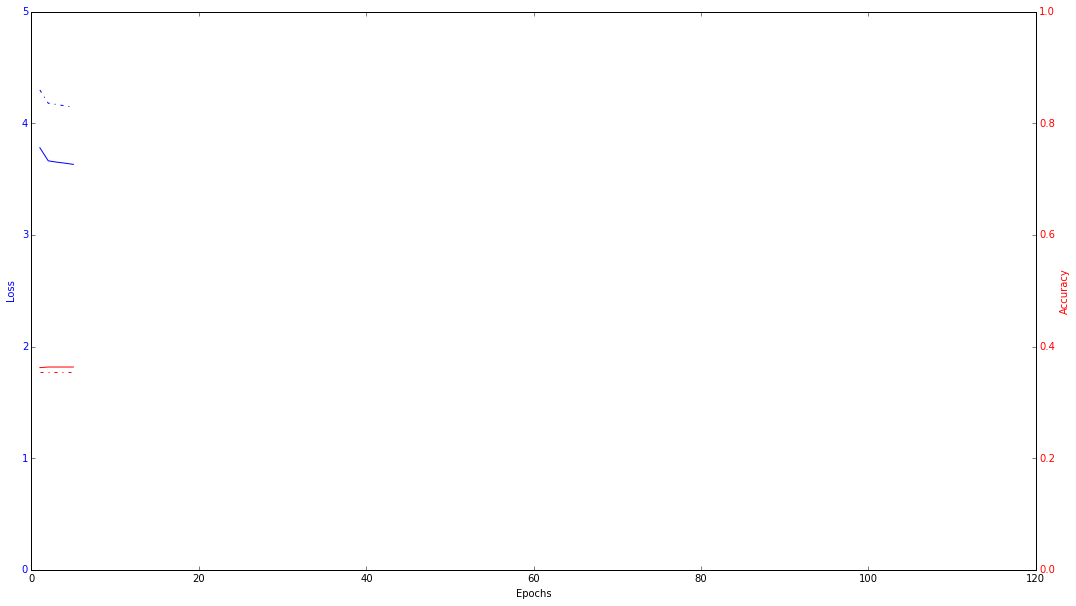

In [5]:
with open('../logs/training_e01.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt, max_epochs=120)